<a href="https://colab.research.google.com/github/ProfAI/machine-learning-modelli-e-algoritmi/blob/main/1%20-%20L'algoritmo%20Gradient%20Descent/stochastic_fullbatch_minibatch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stochastic, Mini Batch e Full Batch Gradient Descend

In [ ]:
from time import time
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import log_loss
from sklearn.linear_model import SGDClassifier
from sklearn.utils import shuffle

In [ ]:
X, Y = make_classification(n_samples=1250, n_features=4, n_informative=2, random_state=0)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

## Stochastic Gradient Descend

In [ ]:
epochs = 5

n_batches=X_train.shape[0]
batch_size = X_train.shape[0]/n_batches

classes = np.unique(Y_train)

sgd = SGDClassifier(loss="log")
sgd_losses = []

tick = time()

for epoch in range(epochs):
        X_shuffled, Y_shuffled = shuffle(X_train, Y_train)
        for batch in range(n_batches):
            batch_start = int(batch*batch_size)
            batch_end = int((batch+1)*batch_size)
            X_batch = X_shuffled[batch_start:batch_end,:]
            Y_batch = Y_shuffled[batch_start:batch_end]

            sgd.partial_fit(X_batch, Y_batch, classes=classes)
            loss = log_loss(Y_test, sgd.predict_proba(X_test),labels=classes)
            sgd_losses.append(loss)       
        print("Loss all'epoca %d = %.4f" % (epoch+1, loss))

print(f"Addestramento completato in {time()-tick:.2f} secondi")

Loss all'epoca 1 = 0.5619
Loss all'epoca 2 = 0.8174
Loss all'epoca 3 = 0.3384
Loss all'epoca 4 = 0.2723
Loss all'epoca 5 = 0.2783
Addestramento completato in 6.07 secondi


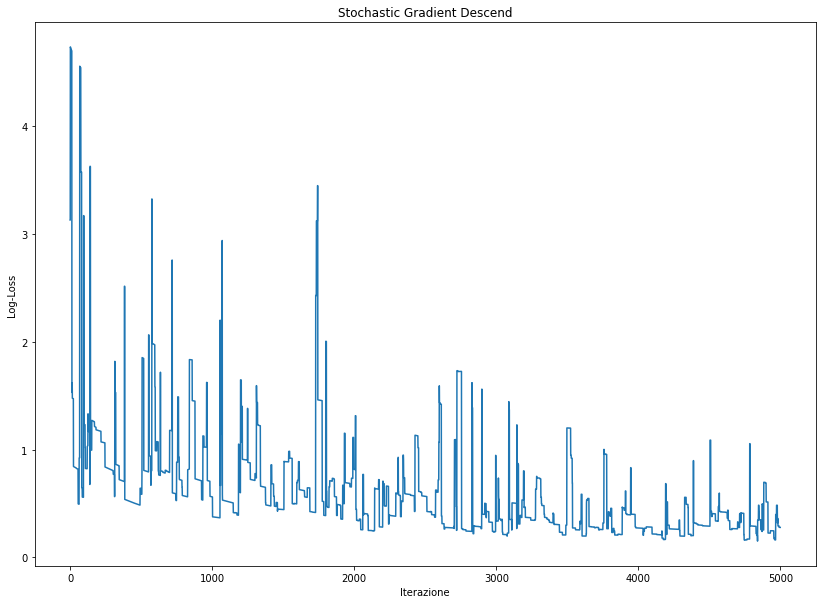

In [ ]:
plt.figure(figsize=(14,10))
plt.title("Stochastic Gradient Descend")
plt.xlabel("Iterazione")
plt.ylabel("Log-Loss")
plt.plot(sgd_losses)

## Full Batch Gradient Descend

In [ ]:
epochs = 200

n_batches=1

batch_size = X_train.shape[0]/n_batches

classes = np.unique(Y)

sgd = SGDClassifier(loss="log")
full_losses = []

tick = time()

for epoch in range(epochs):
        loss = 0.
        X_shuffled, Y_shuffled = shuffle(X_train, Y_train)
        for batch in range(n_batches):
            batch_start = int(batch*batch_size)
            batch_end = int((batch+1)*batch_size)
            X_batch = X_shuffled[batch_start:batch_end,:]
            Y_batch = Y_shuffled[batch_start:batch_end]

            sgd.partial_fit(X_batch, Y_batch, classes=classes)
            loss = log_loss(Y_test, sgd.predict_proba(X_test),labels=classes)
            full_losses.append(loss)       
        print("Loss all'epoca %d = %.4f" % (epoch+1, loss))

print(f"Addestramento completato in {time()-tick:.2f} secondi")

Loss all'epoca 1 = 0.7612
Loss all'epoca 2 = 0.5540
Loss all'epoca 3 = 0.4685
Loss all'epoca 4 = 0.3281
Loss all'epoca 5 = 0.8789
Loss all'epoca 6 = 0.2056
Loss all'epoca 7 = 0.2335
Loss all'epoca 8 = 0.2183
Loss all'epoca 9 = 0.2078
Loss all'epoca 10 = 0.1582
Loss all'epoca 11 = 0.1377
Loss all'epoca 12 = 0.1289
Loss all'epoca 13 = 0.2040
Loss all'epoca 14 = 0.1273
Loss all'epoca 15 = 0.1615
Loss all'epoca 16 = 0.1143
Loss all'epoca 17 = 0.1101
Loss all'epoca 18 = 0.1112
Loss all'epoca 19 = 0.1234
Loss all'epoca 20 = 0.1531
Loss all'epoca 21 = 0.1102
Loss all'epoca 22 = 0.1109
Loss all'epoca 23 = 0.1094
Loss all'epoca 24 = 0.1170
Loss all'epoca 25 = 0.1322
Loss all'epoca 26 = 0.1120
Loss all'epoca 27 = 0.1130
Loss all'epoca 28 = 0.1196
Loss all'epoca 29 = 0.1091
Loss all'epoca 30 = 0.1104
Loss all'epoca 31 = 0.1192
Loss all'epoca 32 = 0.1185
Loss all'epoca 33 = 0.1338
Loss all'epoca 34 = 0.1065
Loss all'epoca 35 = 0.1090
Loss all'epoca 36 = 0.1077
Loss all'epoca 37 = 0.1149
Loss all'e

Il GD è riuscito a convergere fornendo un buon risultato, vediamo il grafico della funzione di costo ad ogni iterazione ( in questo caso un iterazione corrisponde ad un'epoca )

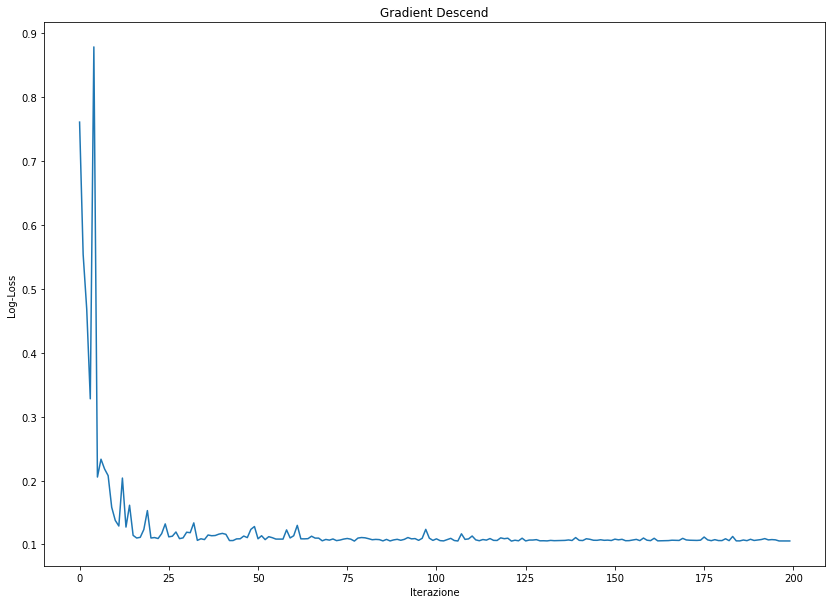

In [ ]:
plt.figure(figsize=(14,10))
plt.title("Gradient Descend")
plt.xlabel("Iterazione")
plt.ylabel("Log-Loss")
plt.plot(full_losses)

## Mini Batch Gradient Descend

In [ ]:
epochs = 50

n_batches=10

batch_size = X_train.shape[0]/n_batches

classes = np.unique(Y)

sgd = SGDClassifier(loss="log")
batch_losses = []

tick = time()

for epoch in range(epochs):
        X_shuffled, Y_shuffled = shuffle(X_train, Y_train)
        for batch in range(n_batches):
            batch_start = int(batch*batch_size)
            batch_end = int((batch+1)*batch_size)
            X_batch = X_shuffled[batch_start:batch_end,:]
            Y_batch = Y_shuffled[batch_start:batch_end]
            sgd.partial_fit(X_batch, Y_batch, classes=classes)
            loss = log_loss(Y_test, sgd.predict_proba(X_test),labels=classes)
            batch_losses.append(loss)       
        print("Loss all'epoca %d = %.4f" % (epoch+1, loss))

print(f"Addestramento completato in {time()-tick:.2f} secondi")

Loss all'epoca 1 = 1.0778
Loss all'epoca 2 = 0.2806
Loss all'epoca 3 = 0.4364
Loss all'epoca 4 = 0.4306
Loss all'epoca 5 = 0.3323
Loss all'epoca 6 = 0.1522
Loss all'epoca 7 = 0.2087
Loss all'epoca 8 = 0.2112
Loss all'epoca 9 = 0.1284
Loss all'epoca 10 = 0.1777
Loss all'epoca 11 = 0.1667
Loss all'epoca 12 = 0.1413
Loss all'epoca 13 = 0.1142
Loss all'epoca 14 = 0.1134
Loss all'epoca 15 = 0.1508
Loss all'epoca 16 = 0.1374
Loss all'epoca 17 = 0.1206
Loss all'epoca 18 = 0.1069
Loss all'epoca 19 = 0.1267
Loss all'epoca 20 = 0.1199
Loss all'epoca 21 = 0.1168
Loss all'epoca 22 = 0.1231
Loss all'epoca 23 = 0.2182
Loss all'epoca 24 = 0.1215
Loss all'epoca 25 = 0.1203
Loss all'epoca 26 = 0.1420
Loss all'epoca 27 = 0.1108
Loss all'epoca 28 = 0.1164
Loss all'epoca 29 = 0.1153
Loss all'epoca 30 = 0.1118
Loss all'epoca 31 = 0.1106
Loss all'epoca 32 = 0.1080
Loss all'epoca 33 = 0.1256
Loss all'epoca 34 = 0.1096
Loss all'epoca 35 = 0.1092
Loss all'epoca 36 = 0.1120
Loss all'epoca 37 = 0.1082
Loss all'e

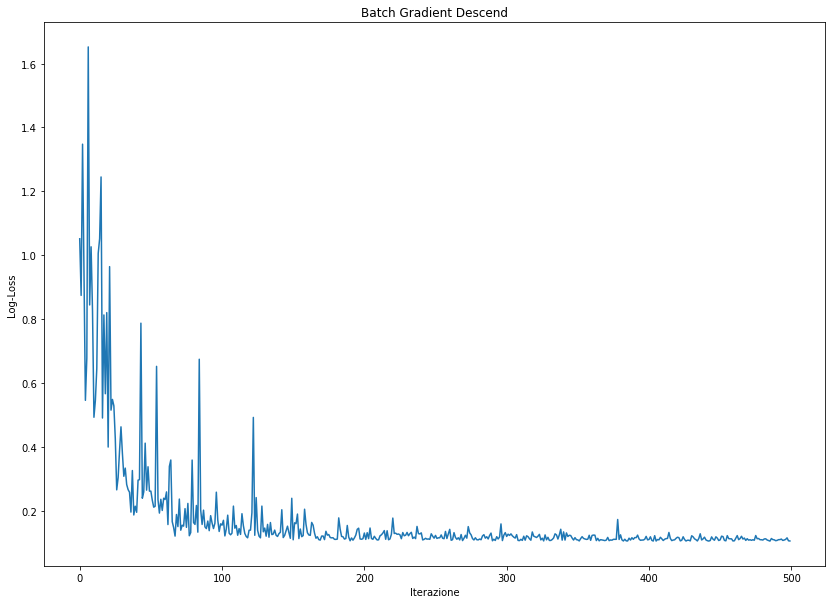

In [ ]:
plt.figure(figsize=(14,10))
plt.title("Batch Gradient Descend")
plt.xlabel("Iterazione")
plt.ylabel("Log-Loss")
plt.plot(batch_losses)

## Il confronto
Confrontiamo le oscillazioni della funzione di costo per Full Batch, Stochastic e Mini Batch Gradient Descend, mettendole su di uno stesso grafico

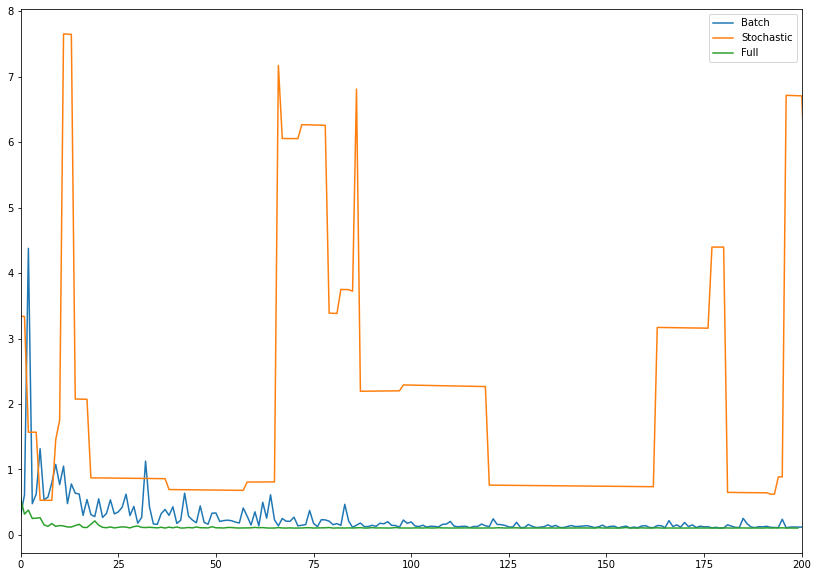

In [ ]:
plt.figure(figsize=(14,10))
plt.plot(batch_losses, label="Batch")
plt.plot(sgd_losses, label="Stochastic")
plt.plot(full_losses,label="Full")
plt.xlim(xmin=0,xmax=200)
plt.legend()
plt.show()